<a href="https://colab.research.google.com/github/deeagjin/Project-2-Data-Science/blob/main/Project_2_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 2 P138002 Notebook**

#**Introduction**
- Attrition has emerged as a critical issue in contemporary business scenarios, pervasive across various organizations. This phenomenon poses a significant challenge as it entails the loss of key skills and knowledge within the organizational framework. Both managers and HR administrators are fervently invested in minimizing turnover rates to enhance overall organizational effectiveness and progress. This strategic focus on retaining employees stems from the recognition that employees represent invaluable assets, contributing quantitatively and qualitatively to the organization. Consequently, maintaining a stable and skilled workforce is imperative.

- While a certain degree of attrition can be advantageous for an organization by facilitating necessary changes, excessive turnover becomes detrimental. High attrition rates lead to heightened investments in employees, both in terms of time and finances. Recruiters emphasize that acquiring skilled employees necessitates substantial investments, and escalating attrition levels amplify these costs.

- The complexities surrounding attrition reasons vary across organizations and countries, contingent upon unique work cultures. The dataset under consideration pertains to a company specializing in the computer field in the USA. It is crucial to note that the findings and insights derived from this analysis are specific to this particular company and may not be universally applicable to other organizations or countries due to contextual variations.


##**Purpose of analysis**

- This notebook is coded to inspect the employee attrition or what we usually called as the turnover in this particular company.

- So that we could observe the ratio between male, female employee that quits, according to their own age, department, education field, job role, job satisfaction and their marital status whether their being single, married or with divorced status.

- The purpose of this analysis also is to identify whether other factor influence attrition such as total income per month and total working years.


##**Problem Statement**
1. Is there any correlation between those variables in the dataset?

2. Is **Attrition** is being influenced by other variables?

3. Does male received higher incomes than female or vice verca?

4. What gender would likely to quit? Female or Male?

5. Does the company loss experienced employees?

6. Is Monthly Income of employess of the company is normally distributed?

#**Coding, Results and Discussion**
- In this part, we will be looking into the coding part, the visualization and results

In [2]:
# Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import data
url = "https://raw.githubusercontent.com/deeagjin/Project-2-Data-Science/main/Data_hr.csv"
datahr = pd.read_csv(url)
datahr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- **Age** ranging from 18 to 60 years old
- **Distance From Home** ranging from 1 to 29 km
- **Total Working Years** ranging from 0 to 40 years
- **Monthly Income** ranging from 1009 to 19999
- **Monthly Date** ranging from 2094 to 26999

In [113]:
datahr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
datahr1 = datahr.select_dtypes('object')
datahr1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [ ]:
datahr2 = datahr.select_dtypes('int64')
datahr2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# data cleaning
# Check for missing values
print("Missing Values Before Cleaning:")
print(datahr.isnull().sum())

Missing Values Before Cleaning:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

In [ ]:
# checking whether there is any duplicated row in the data set.
duplicated_row = datahr.duplicated().any()
duplicated_row

False

In [ ]:
# since the data is already has no NA values,
datahr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
datahr2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**Some columns can be removed as the value does not affect our analysis.**

The columns are as below :-
- **Over18** - The value are all Y
- **Employee Count** - All values are 1
- **StandardHours** - All values are 80
- **EmployeeNumber** - Do not affect analysis

In [117]:
datahr = datahr.drop(['Over18', 'EmployeeCount','StandardHours','EmployeeNumber'], axis = 1)
datahr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

##**EDA**

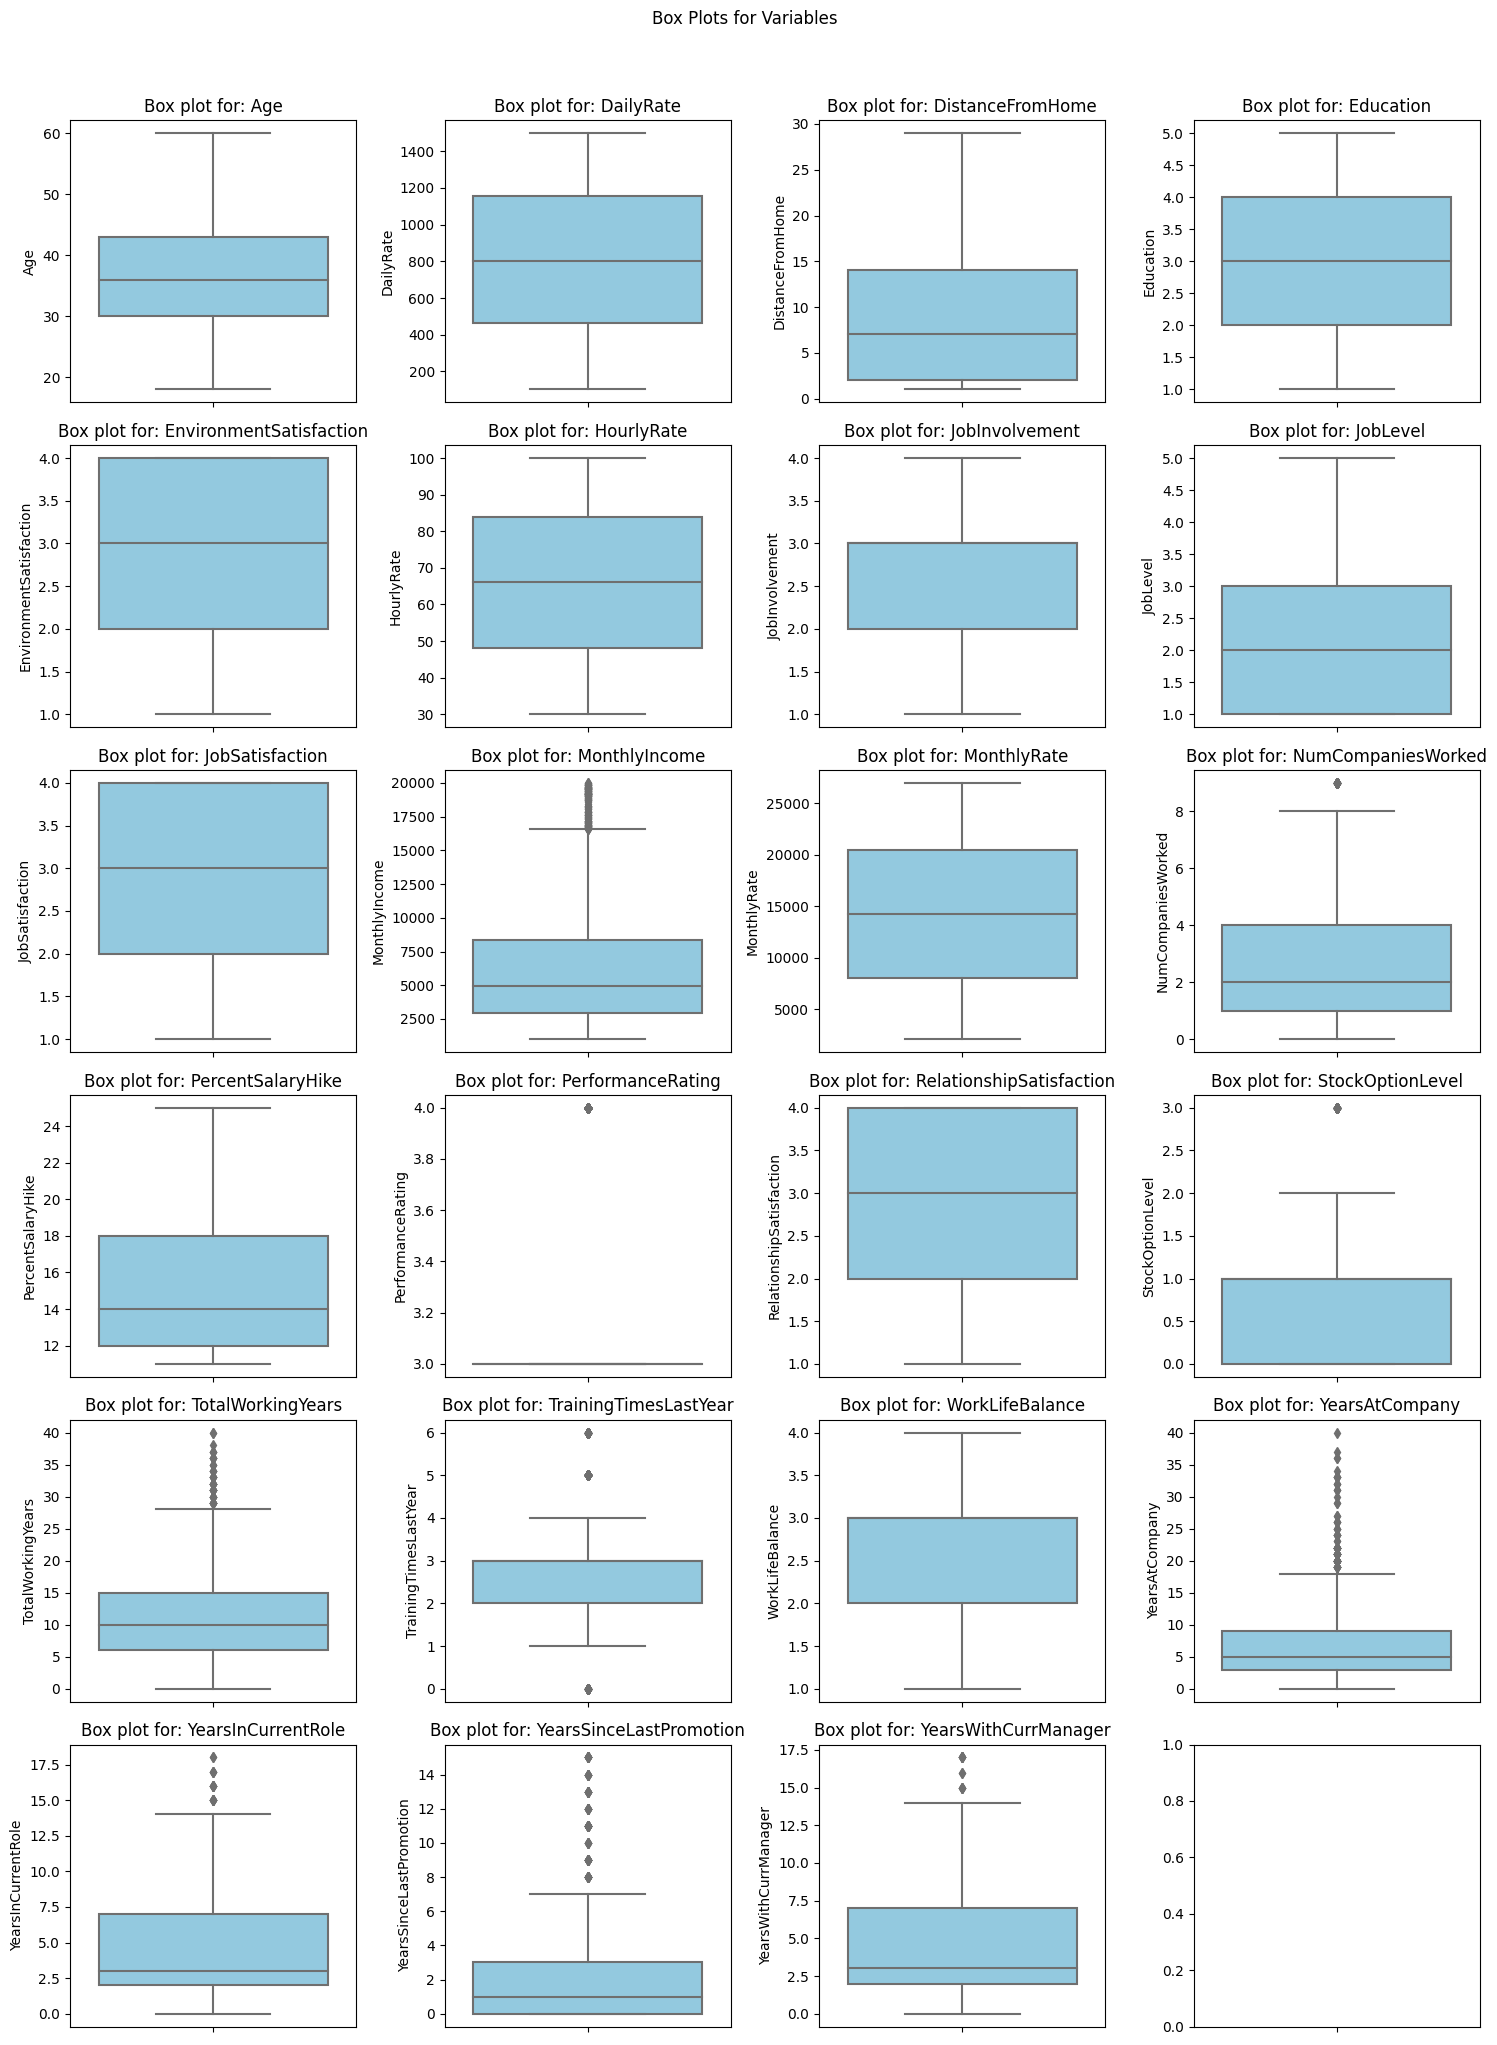

In [14]:
# plot boxplot to represent the distribution of the dataset.
# to provide a summary of key statistical measures.

# list of variable
vars = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
        'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager']

# subplot needed
num_rows= 6
num_col = 4
subplot = num_rows*num_col

# loop to plot
fig, axes = plt.subplots(num_rows,num_col,figsize = (15,20), sharex = True, sharey = False)
fig.suptitle('Box Plots for Variables', y = 1.02)
axes = axes.flatten()

for i,variable in enumerate(vars[:subplot]):
  sns.boxplot(y = variable, data = datahr, color = 'skyblue', ax = axes[i])
  axes[i].set_title('Box plot for: ' + variable)

  # adjust layout
plt.tight_layout()
plt.show();

<ipython-input-119-3eccc57527d6>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



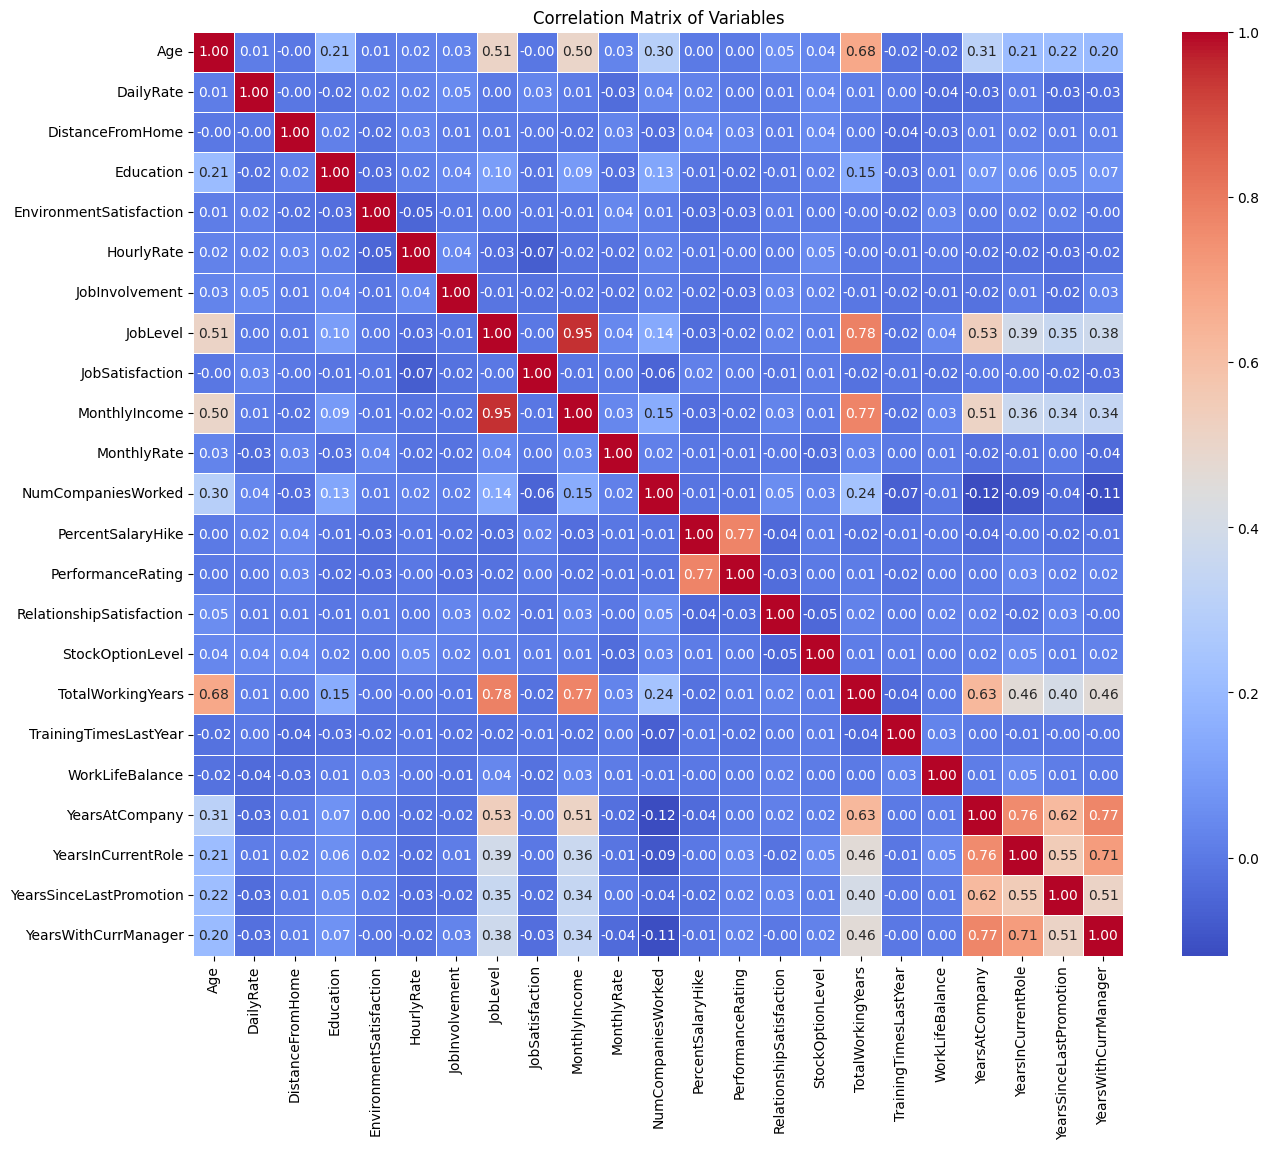

In [119]:
## to see correlation between all variables

# specify data
datahr_reduced = datahr

# Calculate the correlation matrix
correlation_matrix = datahr_reduced.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Matrix of Variables')

# Show the plot
plt.show();


# Based on Correlation Matrix above,
- We can conclude that, Age is highly correlated with Total Working Years (0.68). Indicating that the longer the total working years, the older the employee gets.

- Job Level and Monthly Income are also highly correlated to Total Working Years with correlation of 0.78 and 0.77. This indicates that as the total working years increases, the job level tends to increase as well. In other words, employee who has been working for a longer duration often reach higher job levels within the organization corresponds to their monthly income.

- Next, Percent Salary Hike seems to be positively correlated with Performance rating with correlation of 0.77. The possible reason to explain this is organization often tie salary hikes to performance ratings as a way to reward employess for high performances. It may acts as a motivational factor for employees to improve their performance.

- Other than that, Years At Company seems to be positively correlated to Total Working Years with correlation of 0.63. This suggest that employees hwho have spent more years at the company tend to have a higher total number of working years in their careers.

In [ ]:
## to look the proportion of attrition in the dataset
# group by "attrition" and calculate the counts
grouped_data = datahr.groupby('Attrition').size().reset_index(name= 'Counts')

# calculate propotions of attrition
grouped_data['Proportion'] = (grouped_data['Counts']/grouped_data['Counts'].sum())*100

# sort in descending order
grouped_data = grouped_data.sort_values(by = 'Proportion', ascending = False)
grouped_data

,Attrition,Counts,Proportion
0,No,1233,83.877551
1,Yes,237,16.122449


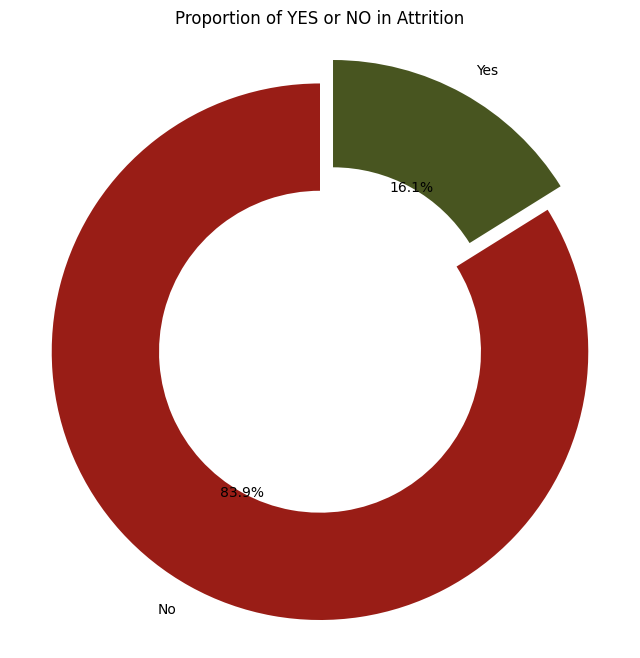

In [ ]:
# plot pie chart
fig, ax = plt.subplots(figsize = (8,8))
colors = ["#991D16", "#485520"]
explode = [0.1,0]                         # set the proportion to explode @ pull out from the pie chart

ax.pie(grouped_data['Proportion'],
       labels=grouped_data['Attrition'],
       autopct='%1.1f%%',                 # formats the percentage to one decimal place.
       startangle=90,                     # starts at 90 degrees (the top of the circle)
       colors=colors,
       explode=explode,
       wedgeprops=dict(width=0.4))        # width = 0.4, create donut like appearance

# customize plot appearance
plt.axis('Equal')
plt.title('Proportion of YES or NO in Attrition');

#Based on the plot above,
- There are about 84% of the employees did not quit the company while 16% did quit the company.To gain more deeper information, we need visualization of attrition vs several other variable

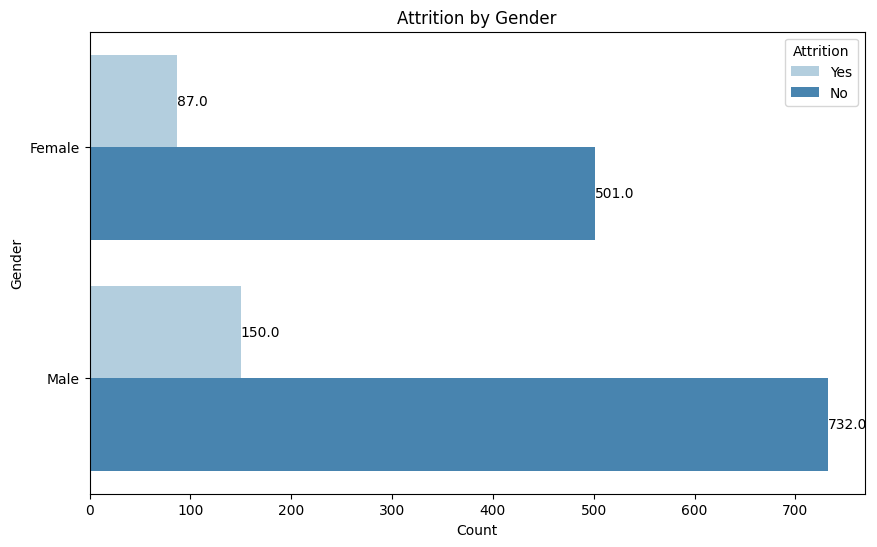

In [27]:
# Create a combined bar plot for 'Yes' and 'No' attrition values
plt.figure(figsize=(10, 6))

ax = sns.countplot(y='Gender', hue='Attrition', data=datahr, palette='Blues')
plt.title('Attrition by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.legend(title='Attrition', loc='upper right')

# Add exact values on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width}', ha='left', va='center')

plt.show()


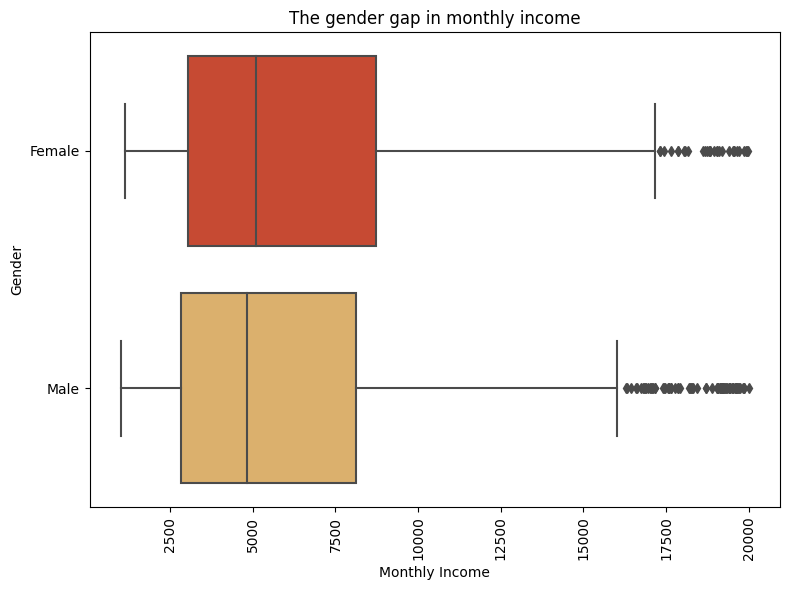

In [143]:
## Monthly Income by Gender

# Set the color palette
colors = ["#DE391B", "#EDB45B"]
sns.set_palette(sns.color_palette(colors))

# Create the boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='MonthlyIncome', y='Gender', data=datahr, showfliers=True)

# Customize the plot
plt.title("The gender gap in monthly income")
plt.xlabel("Monthly Income")
plt.ylabel("Gender")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()


# Based on the plot above,
- There are 150 male and 87 female employees who has quit the company.

- There are 732 male and 501 female employee who stayed working in the company.

- 10.2% of male employee has quit while 5.9% for female employee has quit the company.

- This suggest that Male employee tends to quit more than female employee.

- This is because, from the boxplot, we could see that male employee has median of < 5k compared to female employee. Which can be one of the factor why they left the company.

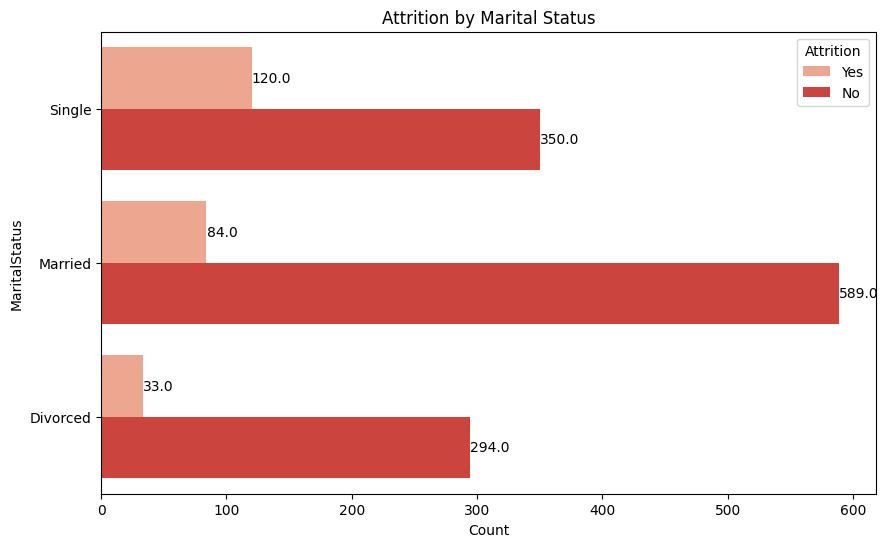

In [61]:
# Compare attrition vs marital status
plt.figure(figsize=(10, 6))

ax = sns.countplot(y='MaritalStatus', hue='Attrition', data=datahr, palette='Reds')
plt.title('Attrition by Marital Status')
plt.xlabel('Count')
plt.ylabel('MaritalStatus')
plt.legend(title='Attrition', loc='upper right')

# Add exact values on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width}', ha='left', va='center')

plt.show()

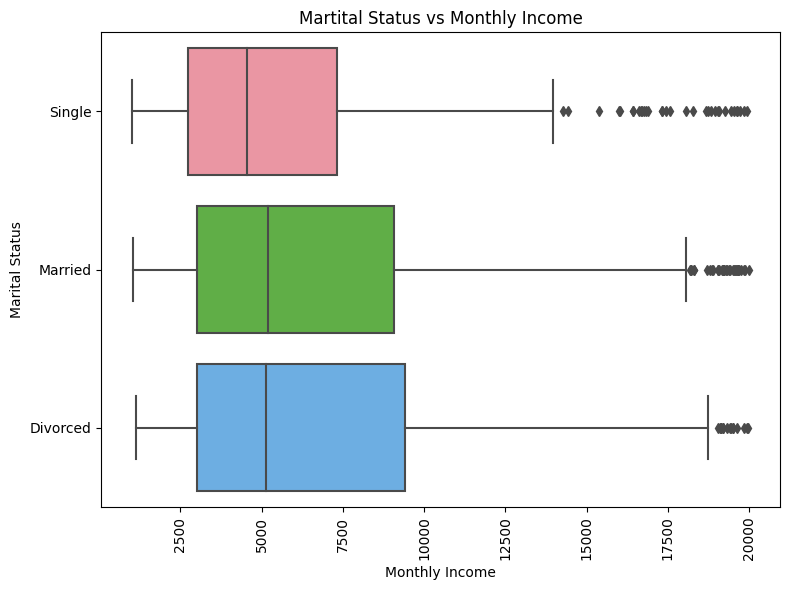

In [139]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='MonthlyIncome', y='MaritalStatus', data=datahr, showfliers=True)

# Customize the plot
plt.title("Martital Status vs Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Marital Status")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()


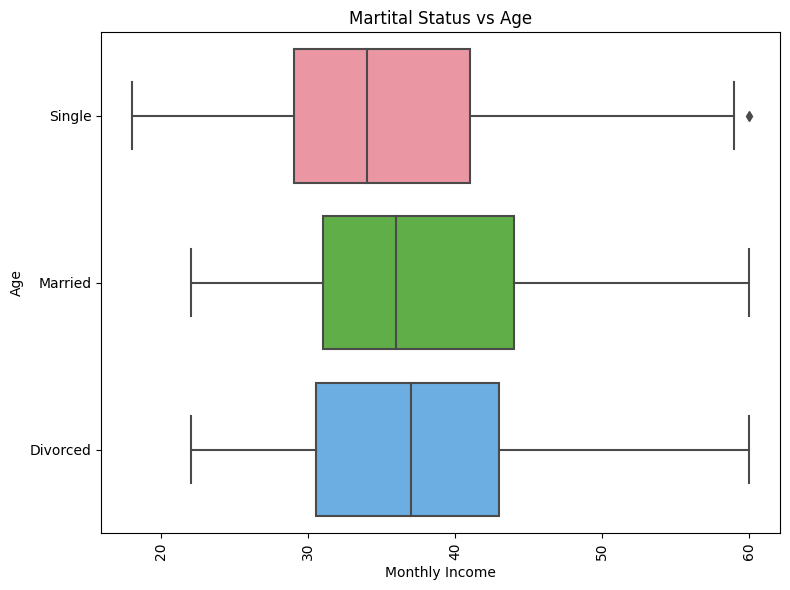

In [142]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='MaritalStatus', data=datahr, showfliers=True)

# Customize the plot
plt.title("Martital Status vs Age")
plt.xlabel("Monthly Income")
plt.ylabel("Age")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()

# Based on the plot above,
- There are 120 employee who has quit the company and 350 single employee stayed. (8.16%)

- There are 84 married who has quit the company and 589 married employee stayed. (5.71%)

- There are 33 divorcee who has quit the company and 294 divorcee stayed. (2.24%)

- With 8.16%, we can conclude that employee who has not married yet, tends to leave the organization compared to the married or divorced employee

- This is because as we can see from the boxplot of monthly income and marital status, those single employee salary shows the lowest median which they receive below than 5k a month compared to those married and divorced employee.

- Those single employee aged between 18 - 35 as we can see from the boxplot since it is skewed to the right. From correlation matrix above, it shows that they have lower total number of working years, suggesting that they could have lower monthly incomee, mainly the reason why they left the company.

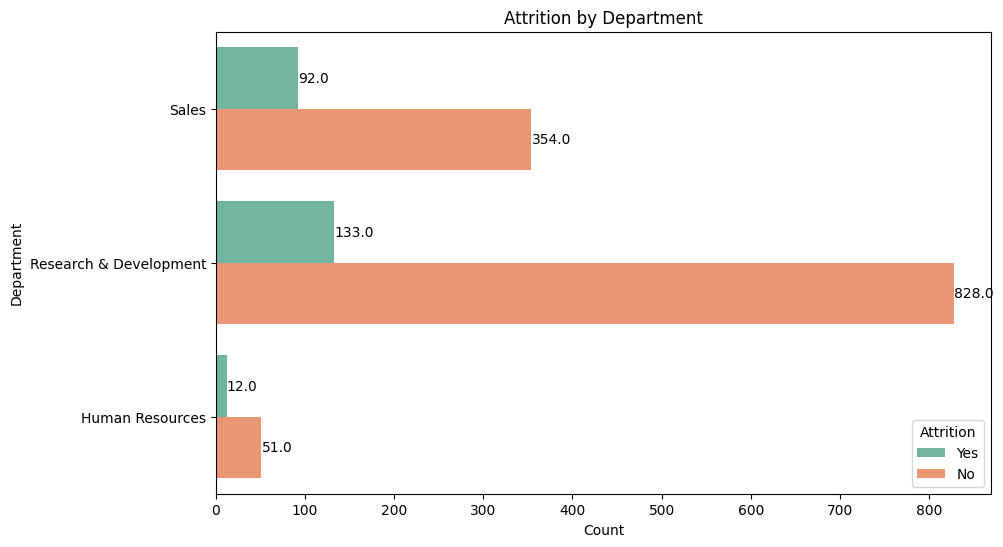

In [80]:
# compare attrition to department
plt.figure(figsize=(10, 6))

ax = sns.countplot(y='Department', hue='Attrition', data=datahr, palette='Set2')
plt.title('Attrition by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title='Attrition', loc='lower right')

# Add exact values on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width}', ha='left', va='center')

plt.show()

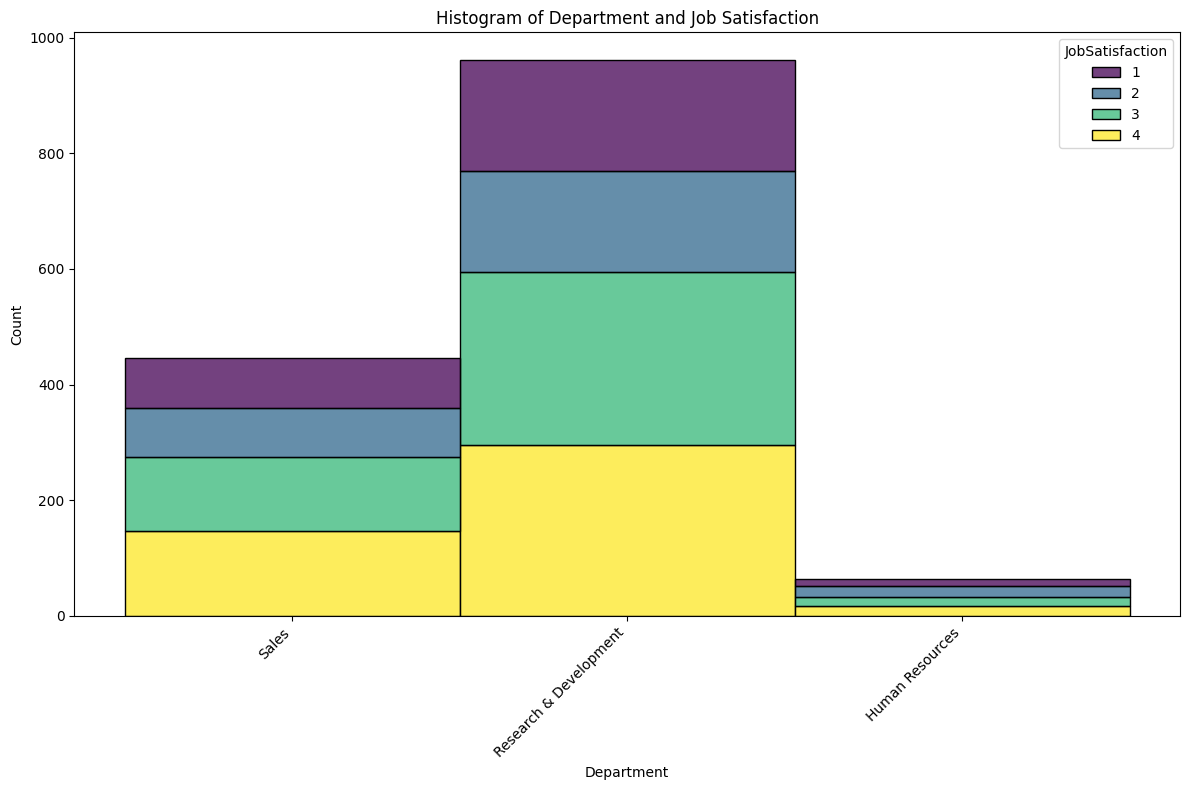

In [146]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a histogram using seaborn
sns.histplot(data=datahr, x='Department', hue='JobSatisfaction', multiple="stack", palette="viridis")

# Add title and labels
plt.title('Histogram of Department and Job Satisfaction')
plt.xlabel('Department')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Based on the plot above,

- There are 92 employee from Sales department who has quit the company and 354 employee stayed. (6.26%)

- There are 133 employee from R&D department who has quit the company and 828 employee stayed. (9.04%)

- There are 12 employee from HR department who has quit the company and 51 employee stayed. (0.82%)

- With 9.04%, we can conclude that employee from R&D department, tends to leave the organization compared to others.

- By looking at the histogram, we could conclude that most R&D employee left the company due to low job satisfaction. This could indicate that there might be specific factors or challenges within the R&D department that contribute to a higher attrition rate compared to other departments.

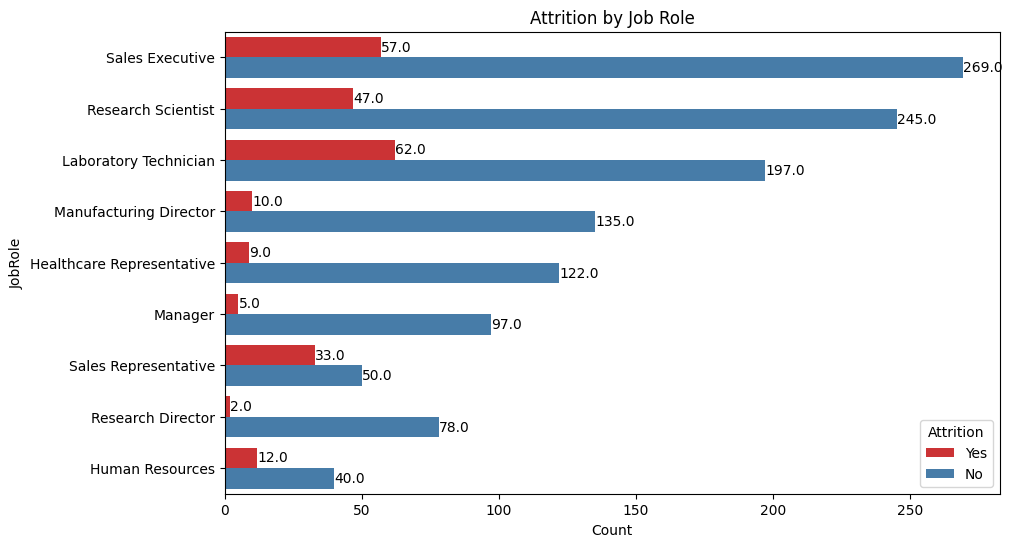

In [76]:
# compare attrition to jobrole
plt.figure(figsize=(10, 6))

ax = sns.countplot(y='JobRole', hue='Attrition', data=datahr, palette='Set1')
plt.title('Attrition by Job Role')
plt.xlabel('Count')
plt.ylabel('JobRole')
plt.legend(title='Attrition', loc='lower right')

# Add exact values on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width}', ha='left', va='center')

plt.show()

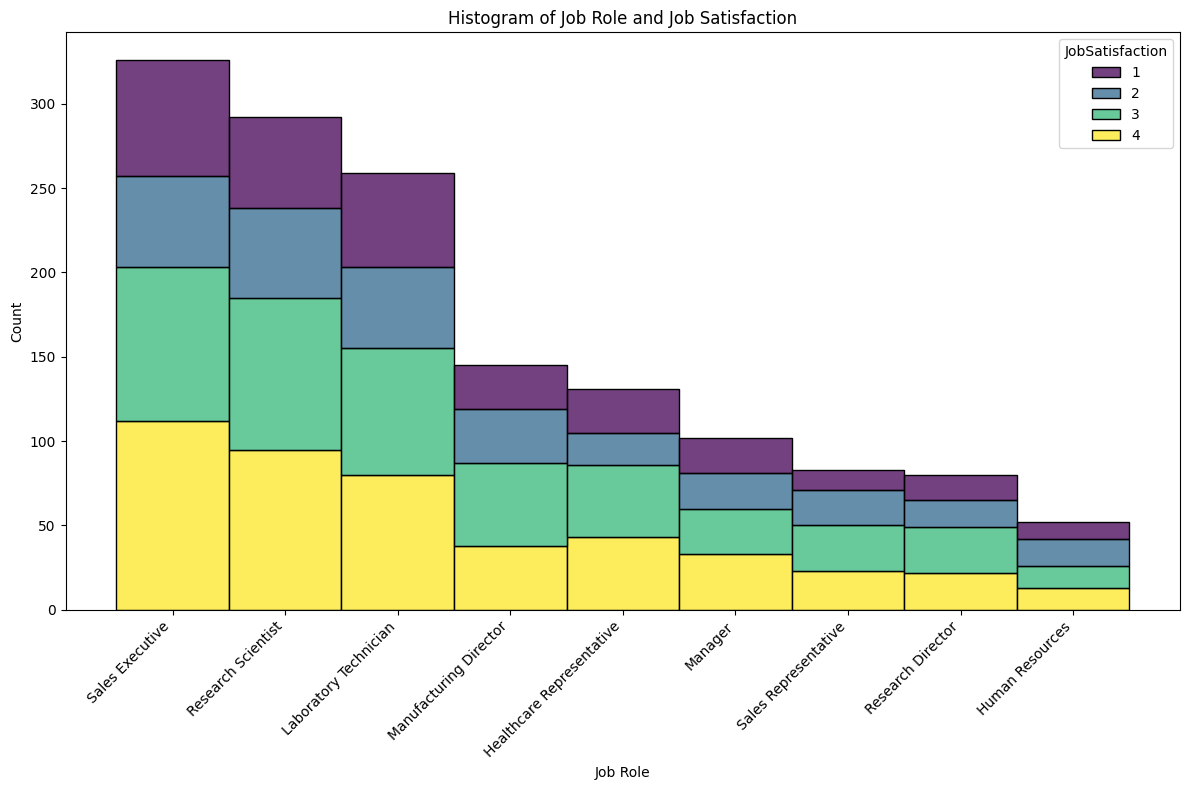

In [148]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a histogram using seaborn
sns.histplot(data=datahr, x='JobRole', hue='JobSatisfaction', multiple="stack", palette="viridis")

# Add title and labels
plt.title('Histogram of Job Role and Job Satisfaction')
plt.xlabel('Job Role')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

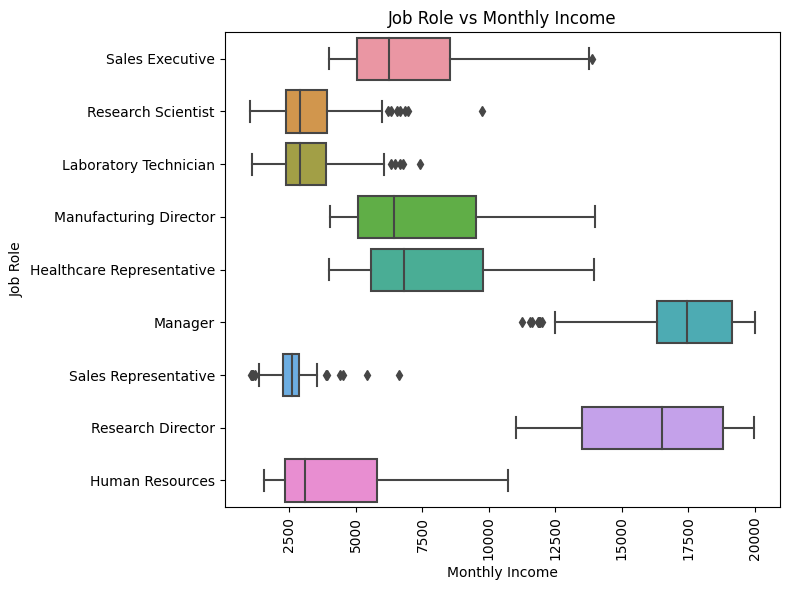

In [147]:
## Monthly Income by Gender

# Set the color palette
colors = ["#DE391B", "#EDB45B"]
sns.set_palette(sns.color_palette(colors))

# Create the boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=datahr, showfliers=True)

# Customize the plot
plt.title("Job Role vs Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Job Role")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()

# Display the plot
plt.show()


# Based on the plot above,

- There are 57 Sales Exec who has quit the company and 269 Sales Exec stayed. (3.87%)

- There are 47 Research Scientist who has quit the company and 245 stayed. (3.2%)

- There are 62 Lab Tech who has quit the company and 197 stayed. (4.22%)

- There are 10 Mfg Director who has quit the company and 135 stayed. (0.68%)

- There are 5 Manager who has quit the company and 97 stayed. (0.34%)

- There are 33 Sales Representative who has quit the company and 50 stayed. (2.24%)

- There are 2  Research Director who has quit the company and 78 stayed. (0.14%)

- There are 12 HR who has quit the company and 40 stayed. (0.82%)

- With 4.22%, we can conclude that employee who work as Lab Technician tends to leave the organization compared to others.

- As we can see, those with high % of attrition shows that they might be has specific factors or challenges in their job scope. Thus, they also has significantly low monthly income. This may influence why they left the company.

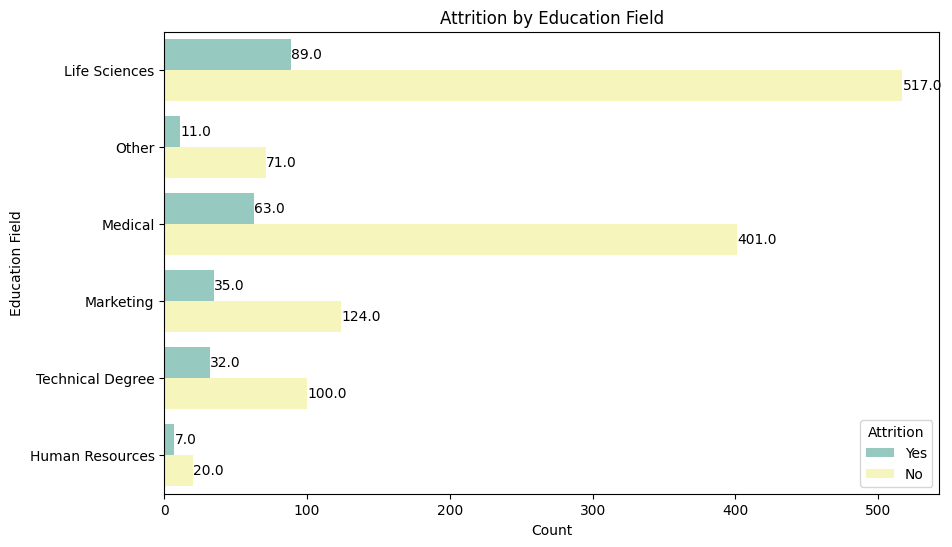

In [85]:
# compare attrition to Education
plt.figure(figsize=(10, 6))

ax = sns.countplot(y='EducationField', hue='Attrition', data=datahr, palette='Set3')
plt.title('Attrition by Education Field')
plt.xlabel('Count')
plt.ylabel('Education Field')
plt.legend(title='Attrition', loc='lower right')

# Add exact values on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width}', ha='left', va='center')

plt.show()

# Based on the plot above,

- There are 89 employee with Life Sciences educational background has quit the company and 517 stayed. (6.05%)

- There are 11 employee with other educational background has quit the company and 71 stayed. (0.75%)

- There are 63 employee with Medical educational background has quit the company and 401 stayed. (4.29%)

- There are 35 employee with Marketing educational background has quit the company and 124 stayed. (2.38%)

- There are 32 employee with Technical Degree educational background has quit the company and 100 stayed. (2.18%)

- There are 7 employee with HReducational background has quit the company and 20 stayed. (0.48%)

- With 6.05%, we can conclude that employee who work as Life Sciences educational background tends to leave the organization compared to others.

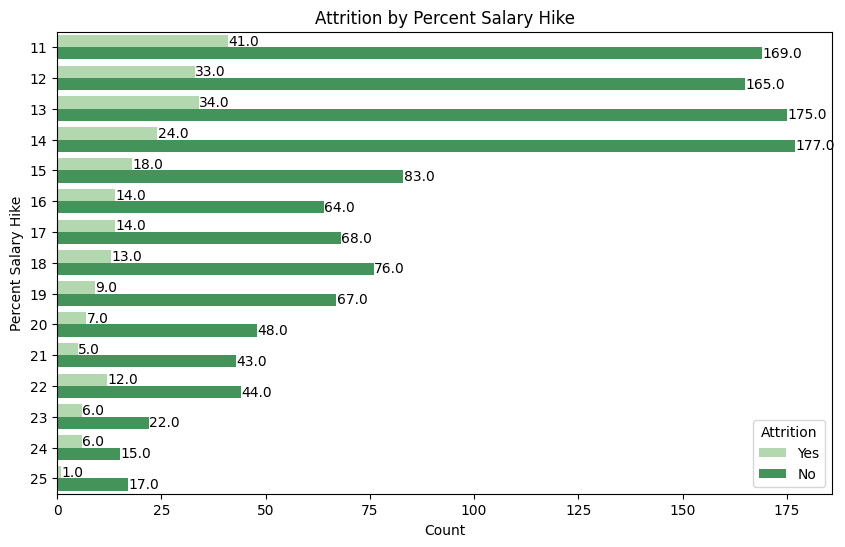

In [120]:
# compare attrition to percent salary hike
plt.figure(figsize=(10, 6))

ax = sns.countplot(y='PercentSalaryHike', hue='Attrition', data=datahr, palette='Greens')
plt.title('Attrition by Percent Salary Hike')
plt.xlabel('Count')
plt.ylabel('Percent Salary Hike')
plt.legend(title='Attrition', loc='lower right')

# Add exact values on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width}', ha='left', va='center')

plt.show()

# Based on the plot above,
- The lowest percent hike 11%, has the highest number of employee leaving the company with 41 counts.

- The highest percent hike 25%, has the lowest number of employee leaving the company with 1 count.

- This indicates that, this analysis suggests an inverse relationship between the percentage salary hike and the likelihood of employees leaving the company. A higher percentage hike seems to be associated with a lower count of employees leaving, while a lower percentage hike is associated with a higher count of employees leaving.

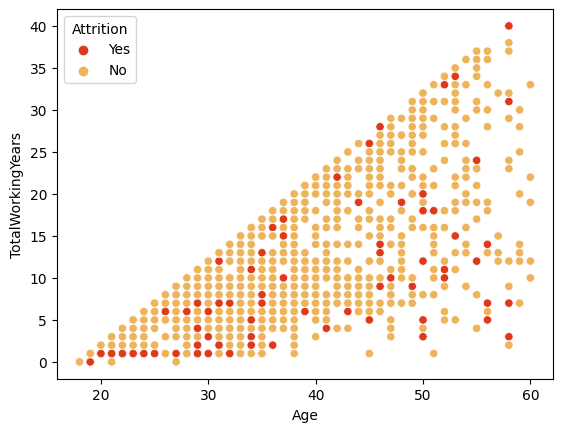

In [104]:
## Scatterplot of Total Working Years and Attrition
sns.scatterplot(data = datahr, x = 'Age', y = 'TotalWorkingYears', hue = 'Attrition');

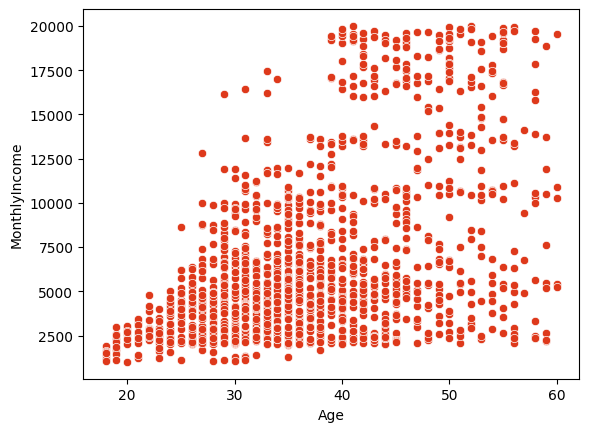

In [102]:
## Scatterplot of Age and Monthly Income
sns.scatterplot(data= datahr, x='Age', y='MonthlyIncome');

# Based on the plot above,

- From the scatterplot, there's a high probability that people starting their career usually tend to quit more often when compared to their experienced counterparts.

- Thus, we can conclude that the company does not lose experienced employees.

- This also can be related due to as people grow older, the opportunites for higher pay open up and older employees tend to earn more, however, wage gap increases as well. Maybe they tend to pension bit later due to this reason.

In [86]:
### Monthly income distribution
import plotly.express as px
import plotly.graph_objects as go

In [94]:
# Histogram Plot
monthly_income_dist = px.histogram(
    datahr,
    x='MonthlyIncome',
    nbins=40,
    labels={'MonthlyIncome': 'Monthly Income'},
    title='Monthly Income Distributions',
    template='plotly_white'
)

# Add vertical lines for mean and median
mean_line = go.Scatter(x=[datahr['MonthlyIncome'].mean()] * 2, y=[0, 300],
                       mode='lines', line=dict(color='#991D16', width=1.5), name='Mean')
median_line = go.Scatter(x=[datahr['MonthlyIncome'].median()] * 2, y=[0, 300],
                         mode='lines', line=dict(color='#485520', width=1.5), name='Median')

monthly_income_dist.add_trace(mean_line)
monthly_income_dist.add_trace(median_line)

# Update layout
monthly_income_dist.update_layout(
    showlegend=True,
    legend=dict(x=0.8, y=0.95),
    xaxis_title='Monthly Income',
    yaxis_title='Count',
    title='Monthly Income Distributions for Employees',
    annotations=[
        dict(
            text='Data Source: Kaggle IBM HR Employee Attrition',
            showarrow=False,
            xref='paper',
            yref='paper',
            x=1,
            y=-0.1
        )
    ]
)

# Show the plot
monthly_income_dist.show()

# Based on the plot above,

- Monthly Income is positively skewed.

- The mean is 6502.93 and the median is 4919.

- Most of employees are paid below the mean and the median of Monthly Income, that is normal in the most of organizations.

# **Conclusion**
In a nutshell,

- EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

- Gender : The Male are more likely to quit.

- JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

- MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

- In conclusion, this analysis sheds light on the pervasive issue of employee attrition within a specific company in the computer field in the USA. The exploration aimed to unravel patterns and factors influencing attrition, emphasizing the importance of understanding the dynamics of employee turnover.

- Organizations strive to minimize turnover rates to enhance overall effectiveness and progress, acknowledging employees as invaluable assets contributing quantitatively and qualitatively to the organization.

- A certain degree of attrition can be advantageous for organizational evolution, but excessive turnover becomes detrimental, leading to heightened investments in employees, both in terms of time and finances.

- Attrition reasons are complex and vary across organizations and countries, contingent upon unique work cultures. It is crucial to recognize that the findings of this analysis are specific to the analyzed company in the computer field in the USA.

- The analysis focused on inspecting employee attrition within the company, exploring factors such as gender, age, department, education field, job role, job satisfaction, and marital status. Additionally, it sought to identify potential influencers of attrition, including total income per month and total working years.
